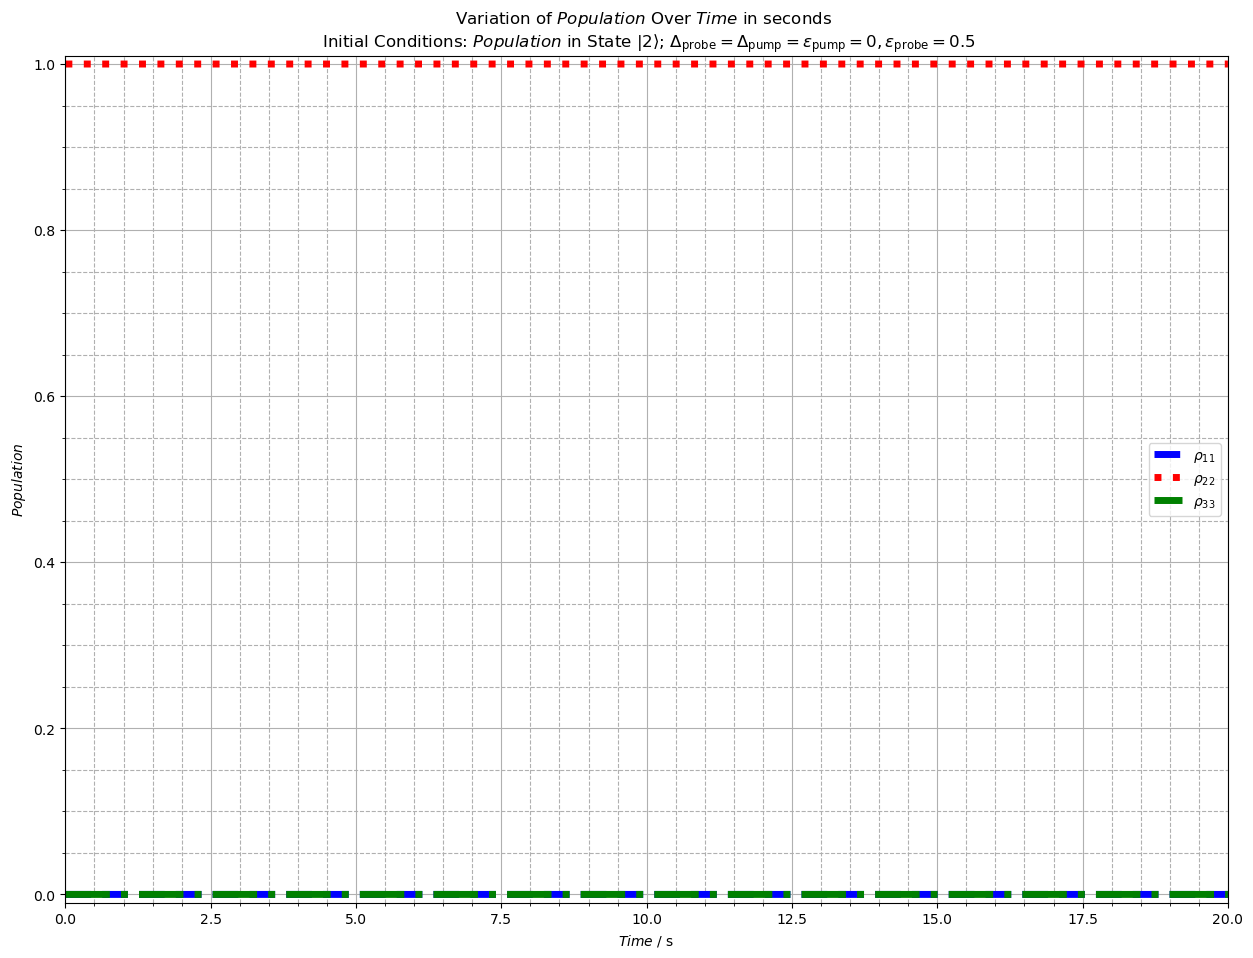

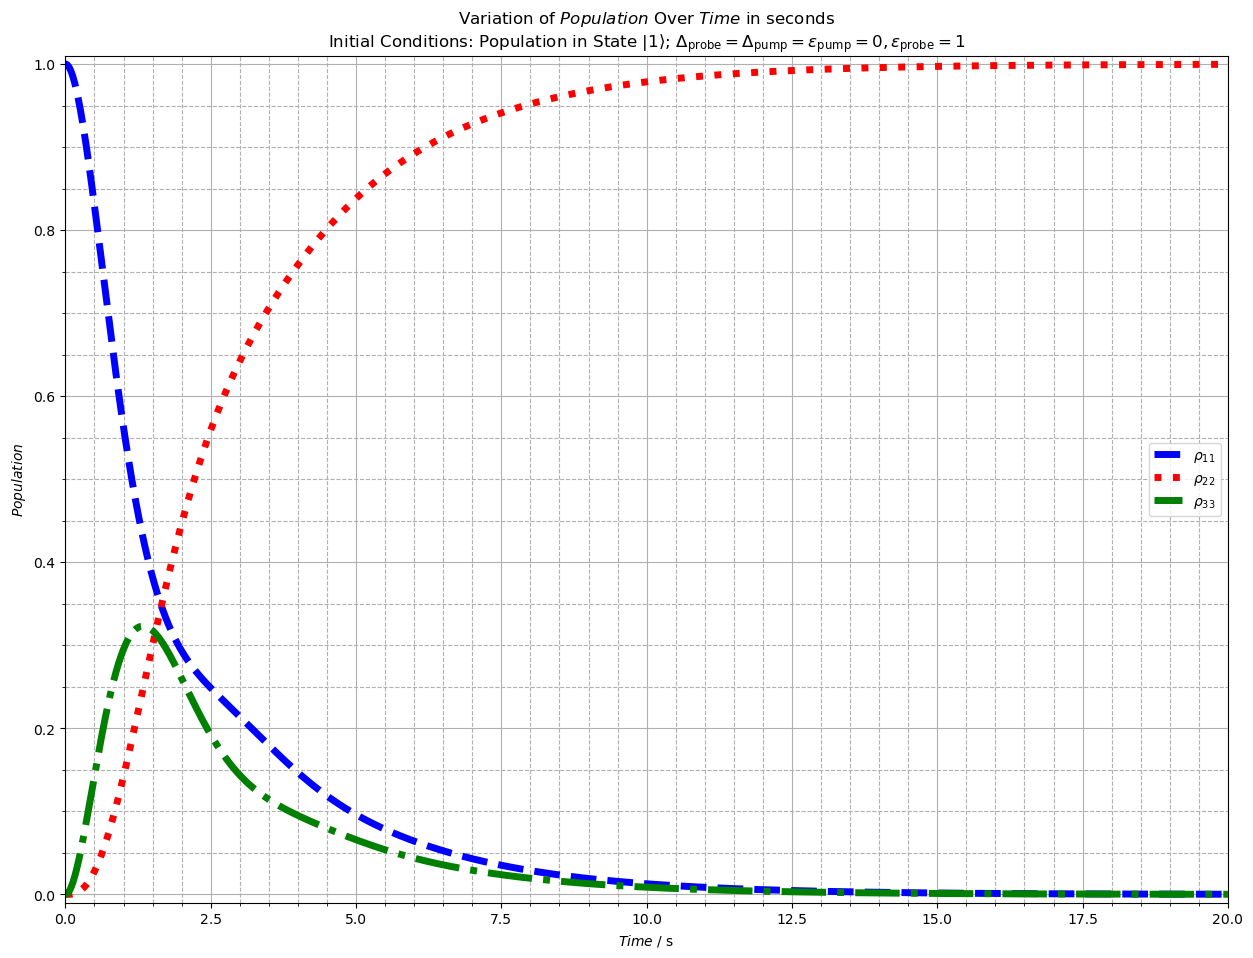

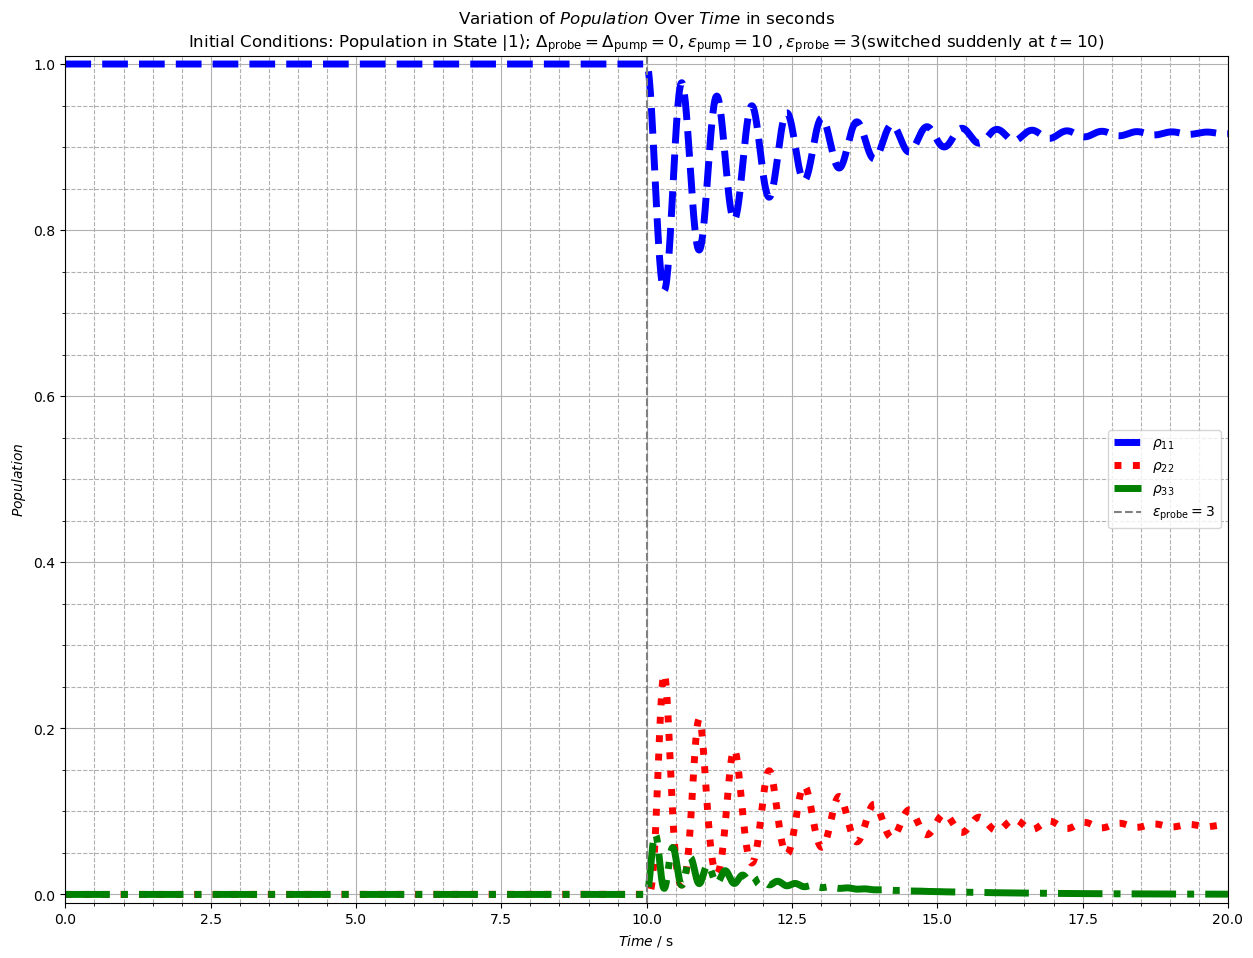

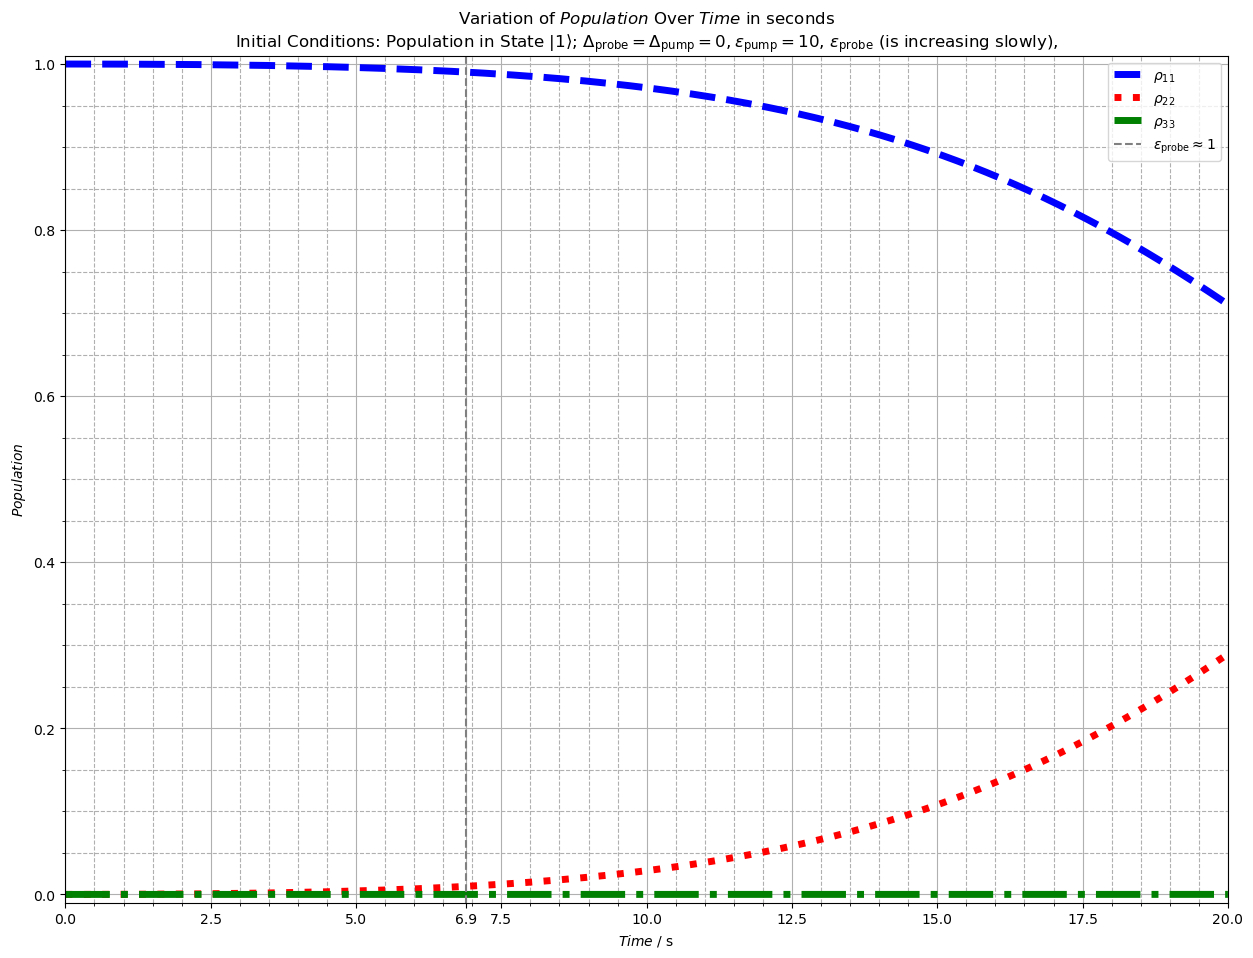

In [4]:
import sympy as sp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Define symbolic variables for Delta_probe, Delta_pump, epsilon_probe, epsilon_pump, rho_ij
Delta_probe, Delta_pump, epsilon_probe, epsilon_pump = sp.symbols('Delta_probe Delta_pump epsilon_probe epsilon_pump')
rho_11, rho_12, rho_13, rho_21, rho_22, rho_23, rho_31, rho_32, rho_33 = sp.symbols('rho_11 rho_12 rho_13 rho_21 rho_22 rho_23 rho_31 rho_32 rho_33')

# Defining imaginary number
j = sp.I

# Define specific values
values = {
    Delta_probe: 0,
    Delta_pump: 0,
    epsilon_probe: 0.5,
    epsilon_pump: 0
}

# Defining the Hamiltonian, Density matrix and lindblad matrix.
H = sp.Matrix([[Delta_probe * j, 0, epsilon_probe * j],
               [0, Delta_pump * j, epsilon_pump * j],
               [epsilon_probe * j, epsilon_pump * j, 0]])

rho = sp.Matrix([[rho_11, rho_12, rho_13],
                 [rho_21, rho_22, rho_23],
                 [rho_31, rho_32, rho_33]])

L = sp.Matrix([[rho_33, 0, -1 * rho_13],
               [0, rho_33, -1 * rho_23],
               [-1 * rho_31, -1 * rho_32, -2 * rho_33]])

H = H.subs(values)
L = L.subs(values)
rho = rho.subs(values)

# Defining the complex differential equation
def combined_differential_equations(current_rho_values, t):
    real_part = current_rho_values[:9].reshape((3, 3)).astype(float)
    imag_part = current_rho_values[9:].reshape((3, 3)).astype(float)
    
    rho = real_part + 1j * imag_part
    
    L_values = L.subs({
        rho_11: rho[0, 0], rho_12: rho[0, 1], rho_13: rho[0, 2],
        rho_21: rho[1, 0], rho_22: rho[1, 1], rho_23: rho[1, 2],
        rho_31: rho[2, 0], rho_32: rho[2, 1], rho_33: rho[2, 2]
    })
    
    dp = np.matmul(rho, H) - np.matmul(H, rho) + L_values
    dp_real = sp.re(sp.expand(dp))
    dp_imag = sp.im(sp.expand(dp))
    
    dp_real_values = np.array(dp_real).astype(float).flatten()
    dp_imag_values = np.array(dp_imag).astype(float).flatten()
    
    return np.concatenate((dp_real_values, dp_imag_values)).tolist()


# Initial conditions 
t = np.linspace(0, 20, 2000)
y0 = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0] + [0, 0, 0, 0, 0, 0, 0, 0, 0]) 

# Solving complex differential equation
Y = odeint(combined_differential_equations, y0, t)

# Extracting real and imaginary parts from the results
real_part = Y[:, :9].reshape((len(t), 3, 3))
imag_part = Y[:, 9:].reshape((len(t), 3, 3))

rho_matrices = real_part + 1j * imag_part

rho_11_values_all = rho_matrices[:, 0, 0]
rho_22_values_all = rho_matrices[:, 1, 1]
rho_33_values_all = rho_matrices[:, 2, 2]


# Plotting, labelling.
plt.figure(figsize=(15, 11))
plt.ylim(-0.01, 1.01)
plt.xlim(0,20)
plt.plot(t, rho_11_values_all, 'b--', label=r'$\rho_{11}$', linewidth=5)
plt.plot(t, rho_22_values_all, 'r:', label=r'$\rho_{22}$', linewidth=5)
plt.plot(t, rho_33_values_all, 'g-.', label=r'$\rho_{33}$', linewidth=5)

plt.minorticks_on()
plt.grid(visible=True, which='major', linestyle='-')
plt.grid(visible=True, which='minor', linestyle='--')

plt.title('Variation of $Population$ Over $Time$ in seconds  \n Initial Conditions: $Population$ in State $|2⟩$; $\Delta_{\mathrm{probe}} = \Delta_{\mathrm{pump}} = \epsilon_{\mathrm{pump}} = 0 , \epsilon_{\mathrm{probe}} = 0.5$')
plt.xlabel(r'$Time\;$/ s ')
plt.ylabel(r'$Population$')
plt.legend()
plt.savefig('Graph1.png', dpi=1000)
plt.show()



# Question 3

values = {
    Delta_probe: 0,
    Delta_pump: 0,
    epsilon_probe: 1,
    epsilon_pump: 0
}

H = sp.Matrix([[Delta_probe * j, 0, epsilon_probe * j],
               [0, Delta_pump * j, epsilon_pump * j],
               [epsilon_probe * j, epsilon_pump * j, 0]])

rho = sp.Matrix([[rho_11, rho_12, rho_13],
                 [rho_21, rho_22, rho_23],
                 [rho_31, rho_32, rho_33]])

L = sp.Matrix([[rho_33, 0, -1 * rho_13],
               [0, rho_33, -1 * rho_23],
               [-1 * rho_31, -1 * rho_32, -2 * rho_33]])

H = H.subs(values)
L = L.subs(values)
rho = rho.subs(values)

def combined_differential_equations(current_rho_values, t):
    real_part = current_rho_values[:9].reshape((3, 3)).astype(float)
    imag_part = current_rho_values[9:].reshape((3, 3)).astype(float)
    
    rho = real_part + 1j * imag_part
    
    L_values = L.subs({
        rho_11: rho[0, 0], rho_12: rho[0, 1], rho_13: rho[0, 2],
        rho_21: rho[1, 0], rho_22: rho[1, 1], rho_23: rho[1, 2],
        rho_31: rho[2, 0], rho_32: rho[2, 1], rho_33: rho[2, 2]
    })
    
    dp = np.matmul(rho, H) - np.matmul(H, rho) + L_values
    dp_real = sp.re(sp.expand(dp))
    dp_imag = sp.im(sp.expand(dp))
    
    dp_real_values = np.array(dp_real).astype(float).flatten()
    dp_imag_values = np.array(dp_imag).astype(float).flatten()
    
    return np.concatenate((dp_real_values, dp_imag_values)).tolist()


# Initial conditions
t = np.linspace(0, 20, 2000)
y0 = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0] + [0, 0, 0, 0, 0, 0, 0, 0, 0]) 
Y = odeint(combined_differential_equations, y0, t)


real_part = Y[:, :9].reshape((len(t), 3, 3))
imag_part = Y[:, 9:].reshape((len(t), 3, 3))

rho_matrices = real_part + 1j * imag_part

rho_11_values_all = rho_matrices[:, 0, 0]
rho_22_values_all = rho_matrices[:, 1, 1]
rho_33_values_all = rho_matrices[:, 2, 2]


# Plotting
plt.figure(figsize=(15, 11))
plt.ylim(-0.01, 1.01)
plt.xlim(0,20)
plt.plot(t, rho_11_values_all, 'b--', label=r'$\rho_{11}$', linewidth=5)
plt.plot(t, rho_22_values_all, 'r:', label=r'$\rho_{22}$', linewidth=5)
plt.plot(t, rho_33_values_all, 'g-.', label=r'$\rho_{33}$', linewidth=5)

plt.minorticks_on()
plt.grid(visible=True, which='major', linestyle='-')
plt.grid(visible=True, which='minor', linestyle='--')

plt.title('Variation of $Population$ Over $Time$ in seconds \nInitial Conditions: Population in State $|1⟩$; $\Delta_{\mathrm{probe}} = \Delta_{\mathrm{pump}} = \epsilon_{\mathrm{pump}} = 0, \epsilon_{\mathrm{probe}} = 1$')
plt.xlabel(r'$Time\;$/ s ')
plt.ylabel(r'$Population$')
plt.legend()
plt.savefig('Graph2.png', dpi=1000)
plt.show()



# Question 4i)



H = sp.Matrix([[Delta_probe * j, 0, epsilon_probe * j],
               [0, Delta_pump * j, epsilon_pump * j],
               [epsilon_probe * j, epsilon_pump * j, 0]])

rho = sp.Matrix([[rho_11, rho_12, rho_13],
                 [rho_21, rho_22, rho_23],
                 [rho_31, rho_32, rho_33]])

L = sp.Matrix([[rho_33, 0, -1 * rho_13],
               [0, rho_33, -1 * rho_23],
               [-1 * rho_31, -1 * rho_32, -2 * rho_33]])


L = L.subs(values)
rho = rho.subs(values)




def combined_differential_equations(current_rho_values, t):
    real_part = current_rho_values[:9].reshape((3, 3)).astype(float)
    imag_part = current_rho_values[9:].reshape((3, 3)).astype(float)
    
    rho = real_part + 1j * imag_part
    
    L_values = L.subs({
        rho_11: rho[0, 0], rho_12: rho[0, 1], rho_13: rho[0, 2],
        rho_21: rho[1, 0], rho_22: rho[1, 1], rho_23: rho[1, 2],
        rho_31: rho[2, 0], rho_32: rho[2, 1], rho_33: rho[2, 2]
    })
    
    if t > 10:
        
        epsilon_probe_values = 3
    else:
        epsilon_probe_values = 0
    
    H_values = H.subs({
        Delta_probe: 0,
        Delta_pump: 0,
        epsilon_probe: epsilon_probe_values,
        epsilon_pump: 10
    })
    
    dp = np.matmul(rho, H_values) - np.matmul(H_values, rho) + L_values
    dp_real = sp.re(sp.expand(dp))
    dp_imag = sp.im(sp.expand(dp))
    
    dp_real_values = np.array(dp_real).astype(float).flatten()
    dp_imag_values = np.array(dp_imag).astype(float).flatten()
    
    return np.concatenate((dp_real_values, dp_imag_values)).tolist()


# Initial conditions 
t = np.linspace(0, 20, 2000)
y0 = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0] + [0, 0, 0, 0, 0, 0, 0, 0, 0])  

Y = odeint(combined_differential_equations, y0, t)


real_part = Y[:, :9].reshape((len(t), 3, 3))
imag_part = Y[:, 9:].reshape((len(t), 3, 3))

rho_matrices = real_part + 1j * imag_part

rho_11_values_all = rho_matrices[:, 0, 0]
rho_22_values_all = rho_matrices[:, 1, 1]
rho_33_values_all = rho_matrices[:, 2, 2]

# Plotting
plt.figure(figsize=(15, 11))
plt.ylim(-0.01, 1.01)
plt.xlim(0,20)
plt.plot(t, rho_11_values_all, 'b--', label=r'$\rho_{11}$', linewidth=5)
plt.plot(t, rho_22_values_all, 'r:', label=r'$\rho_{22}$', linewidth=5)
plt.plot(t, rho_33_values_all, 'g-.', label=r'$\rho_{33}$', linewidth=5)

plt.minorticks_on()
plt.grid(visible=True, which='major', linestyle='-')
plt.grid(visible=True, which='minor', linestyle='--')

plt.title('Variation of $Population$ Over $Time$ in seconds\nInitial Conditions: Population in State $|1⟩$; $\Delta_{\mathrm{probe}} = \Delta_{\mathrm{pump}} = 0 ,  \epsilon_{\mathrm{pump}} = 10 \ , \epsilon_{\mathrm{probe}} = 3$(switched suddenly at $t=10$)')
plt.xlabel(r'$Time\;$/ s ')
plt.ylabel(r'$Population$')
plt.axvline(x=10, color='grey', linestyle='--', label='$\epsilon_{\mathrm{probe}} = 3$')
plt.legend()
plt.savefig('Graph3.png', dpi=1000)
plt.show()


# Question 4ii)


H = sp.Matrix([[Delta_probe * j, 0, epsilon_probe * j],
               [0, Delta_pump * j, epsilon_pump * j],
               [epsilon_probe * j, epsilon_pump * j, 0]])

rho = sp.Matrix([[rho_11, rho_12, rho_13],
                 [rho_21, rho_22, rho_23],
                 [rho_31, rho_32, rho_33]])

L = sp.Matrix([[rho_33, 0, -1 * rho_13],
               [0, rho_33, -1 * rho_23],
               [-1 * rho_31, -1 * rho_32, -2 * rho_33]])

L = L.subs(values)
rho = rho.subs(values)

def expo(t, k):
    return np.exp(k*t)-1


def combined_differential_equations(current_rho_values, t):
    real_part = current_rho_values[:9].reshape((3, 3)).astype(float)
    imag_part = current_rho_values[9:].reshape((3, 3)).astype(float)
    
    rho = real_part + 1j * imag_part
    
    L_values = L.subs({
        rho_11: rho[0, 0], rho_12: rho[0, 1], rho_13: rho[0, 2],
        rho_21: rho[1, 0], rho_22: rho[1, 1], rho_23: rho[1, 2],
        rho_31: rho[2, 0], rho_32: rho[2, 1], rho_33: rho[2, 2]
    })
    
        
    epsilon_probe_values = expo(t, k=0.1)
    
    H_values = H.subs({
        Delta_probe: 0,
        Delta_pump: 0,
        epsilon_probe: epsilon_probe_values,
        epsilon_pump: 10
    })
    
    dp = np.matmul(rho, H_values) - np.matmul(H_values, rho) + L_values
    dp_real = sp.re(sp.expand(dp))
    dp_imag = sp.im(sp.expand(dp))
    
    dp_real_values = np.array(dp_real).astype(float).flatten()
    dp_imag_values = np.array(dp_imag).astype(float).flatten()
    
    return np.concatenate((dp_real_values, dp_imag_values)).tolist()


# Initial conditions 
t = np.linspace(0, 20, 2000)
y0 = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0] + [0, 0, 0, 0, 0, 0, 0, 0, 0])  

Y = odeint(combined_differential_equations, y0, t)

real_part = Y[:, :9].reshape((len(t), 3, 3))
imag_part = Y[:, 9:].reshape((len(t), 3, 3))

rho_matrices = real_part + 1j * imag_part

rho_11_values_all = rho_matrices[:, 0, 0]
rho_22_values_all = rho_matrices[:, 1, 1]
rho_33_values_all = rho_matrices[:, 2, 2]

# Plotting
plt.figure(figsize=(15, 11))
plt.ylim(-0.01, 1.01)
plt.xlim(0,20)
plt.plot(t, rho_11_values_all, 'b--', label=r'$\rho_{11}$', linewidth=5)
plt.plot(t, rho_22_values_all, 'r:', label=r'$\rho_{22}$', linewidth=5)
plt.plot(t, rho_33_values_all, 'g-.', label=r'$\rho_{33}$', linewidth=5)

plt.minorticks_on()
plt.grid(visible=True, which='major', linestyle='-')
plt.grid(visible=True, which='minor', linestyle='--')

plt.title('Variation of $Population$ Over $Time$ in seconds \nInitial Conditions: Population in State $|1⟩$; $\Delta_{\mathrm{probe}} = \Delta_{\mathrm{pump}} = 0 ,  \epsilon_{\mathrm{pump}} = 10 $, $\epsilon_{\mathrm{probe}}$ (is increasing slowly),')
plt.xlabel(r'$Time\;$/ s ')
plt.ylabel(r'$Population$')

plt.axvline(x=6.9, color='grey', linestyle='--', label=r'$\epsilon_{\mathrm{probe}}\approx 1$')
plt.legend()
plt.xticks(ticks=[*plt.xticks()[0], 6.9])
plt.savefig('Graph4.png', dpi=1000)
plt.show()